**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 18. New Predictors from Old &mdash; Part 2

*Edit and run the cell below to resize the plots.*

In [1]:
options(repr.plot.width=8, repr.plot.height=8)

## Including polynomial terms

- Consider the following model with polynomial terms:

    $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2 + \beta_4 X_2^2 + \varepsilon $$

- We can fit such a model with the following R code:

```r
fit <- lm(y ~ x1 + I(x1^2) + x2 + I(x2^2))
```

- `I()` is used to ensure that operators are treated as math

## Including an interaction term

- Consider the following model with polynomial terms:

    $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \varepsilon $$

- We can fit such a model with the following R code:

```r
fit <- lm(y ~ x1 + x2 + x1:x2)
```

## Example 1

The dataset `Perch` contains the weight (in grams), length (in centimeters), and width (in centimeters) for 56 perch caught in a lake in Finland.

![https://www.flickr.com/photos/chesbayprogram/26004012710](img/perch.jpg)

In [2]:
library(Stat2Data)
data(Perch)

We would like to find a model that does a good job predicting perch weight based on the fish's width and/or length.
We'll explore three potential models.
For each one, report whether the linearity condition appears to be met, and the $R^2_{adj}$ value.

### a.
__Model 1.__
A two-predictor model using linear terms for both predictors.

$$ \mathit{Weight} = \beta_0 + \beta_1 \mathit{Width} + \beta_2 \mathit{Length} + \varepsilon $$


Call:
lm(formula = Weight ~ Width + Length, data = Perch)

Residuals:
    Min      1Q  Median      3Q     Max 
-113.86  -59.02  -23.29   30.93  299.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -578.758     43.667 -13.254  < 2e-16 ***
Width        113.500     30.265   3.750 0.000439 ***
Length        14.307      5.659   2.528 0.014475 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 88.68 on 53 degrees of freedom
Multiple R-squared:  0.9373,	Adjusted R-squared:  0.9349 
F-statistic: 396.1 on 2 and 53 DF,  p-value: < 2.2e-16


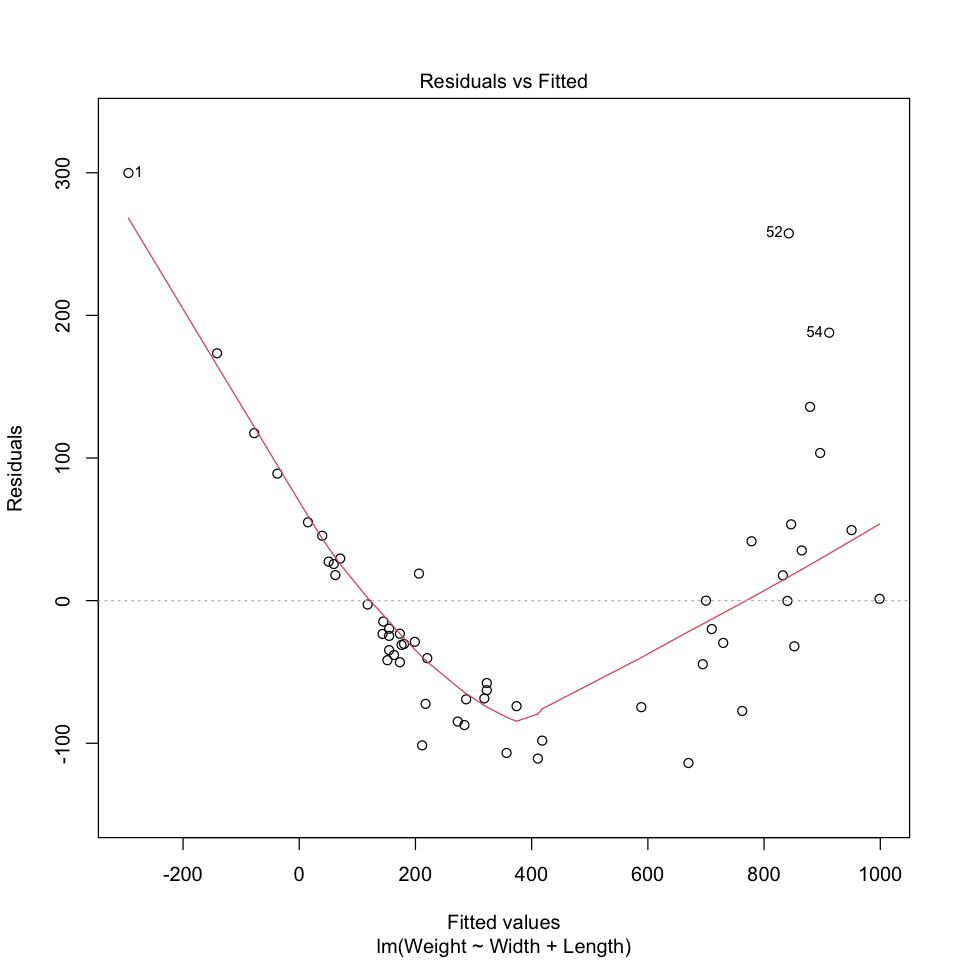

In [3]:
# Solution
fit <- lm(Weight ~ Width + Length, data = Perch)
summary(fit)
plot(fit, which = 1)

*Write your notes here. Double-click to edit.*

*Solution.* 

- Linearity is not met: residuals vs. fitted values plot exhibits strong curvature.

- Adjusted $R^2$ = 0.9349

### b.
__Model 2.__
A model that includes both predictors and their interaction.

$$ \mathit{Weight} = \beta_0 + \beta_1 \mathit{Width} + \beta_2 \mathit{Length} + \beta_3 (\mathit{Width} \times \mathit{Length}) + \varepsilon $$


Call:
lm(formula = Weight ~ Width + Length + Width:Length, data = Perch)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.106  -12.226    1.230    8.489  181.408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  113.9349    58.7844   1.938    0.058 .  
Width        -94.6309    22.2954  -4.244 9.06e-05 ***
Length        -3.4827     3.1521  -1.105    0.274    
Width:Length   5.2412     0.4131  12.687  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.24 on 52 degrees of freedom
Multiple R-squared:  0.9847,	Adjusted R-squared:  0.9838 
F-statistic:  1115 on 3 and 52 DF,  p-value: < 2.2e-16


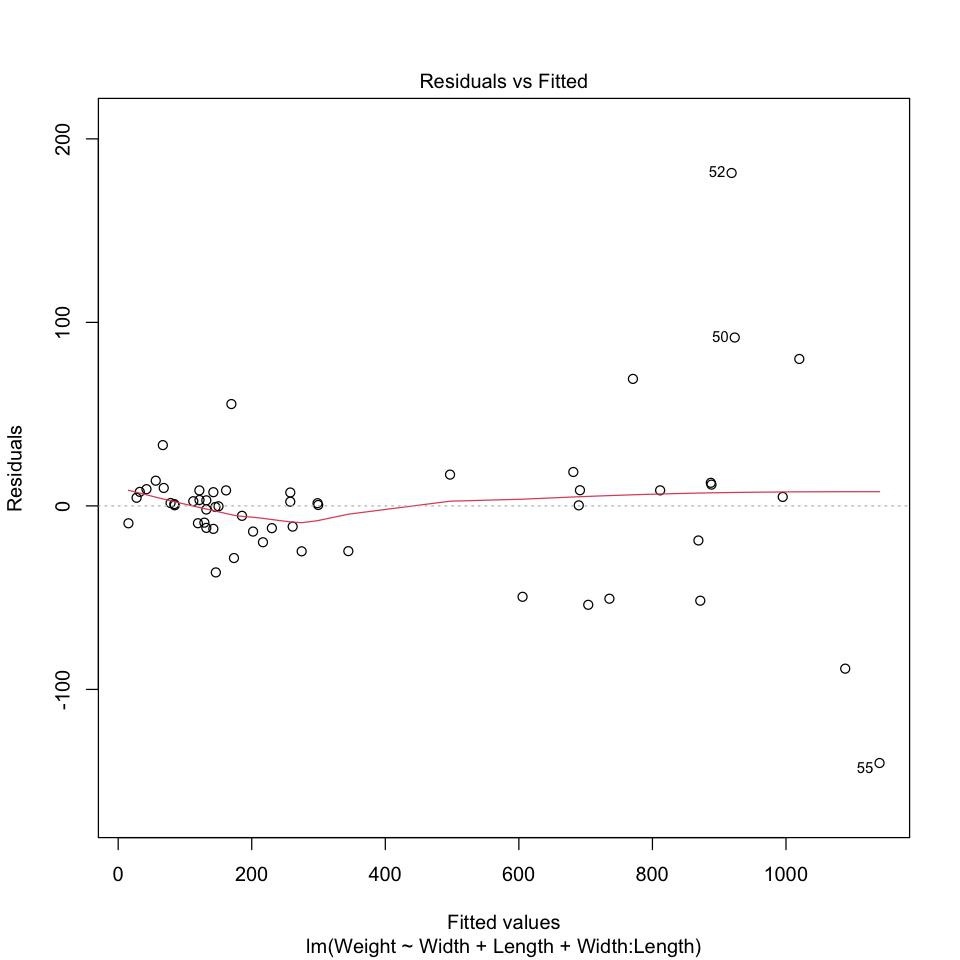

In [4]:
# Solution
fit <- lm(Weight ~ Width + Length + Width:Length, data = Perch)
summary(fit)
plot(fit, which = 1)

*Write your notes here. Double-click to edit.*

*Solution.* 

- Linearity is met: residuals vs. fitted values plot has points roughly evenly distributed above and below the residuals = 0 line.

- Adjusted $R^2$ = 0.9838

### c.
__Model 3.__
A complete second order model.

$$ \mathit{Weight} = \beta_0 + \beta_1 \mathit{Width} + \beta_2 \mathit{Length} + \beta_3 (\mathit{Width} \times \mathit{Length}) + \beta_4 \mathit{Width}^2 + \beta_5 \mathit{Length}^2 + \varepsilon $$


Call:
lm(formula = Weight ~ Width + Length + Width:Length + I(Width^2) + 
    I(Length^2), data = Perch)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.175  -11.904    2.822   11.556  157.596 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  156.3486    61.4152   2.546   0.0140 *
Width         20.9772    82.5877   0.254   0.8005  
Length       -25.0007    14.2729  -1.752   0.0860 .
I(Width^2)    34.4058    18.7455   1.835   0.0724 .
I(Length^2)    1.5719     0.7244   2.170   0.0348 *
Width:Length  -9.7763     7.1455  -1.368   0.1774  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.13 on 50 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9846 
F-statistic: 704.6 on 5 and 50 DF,  p-value: < 2.2e-16


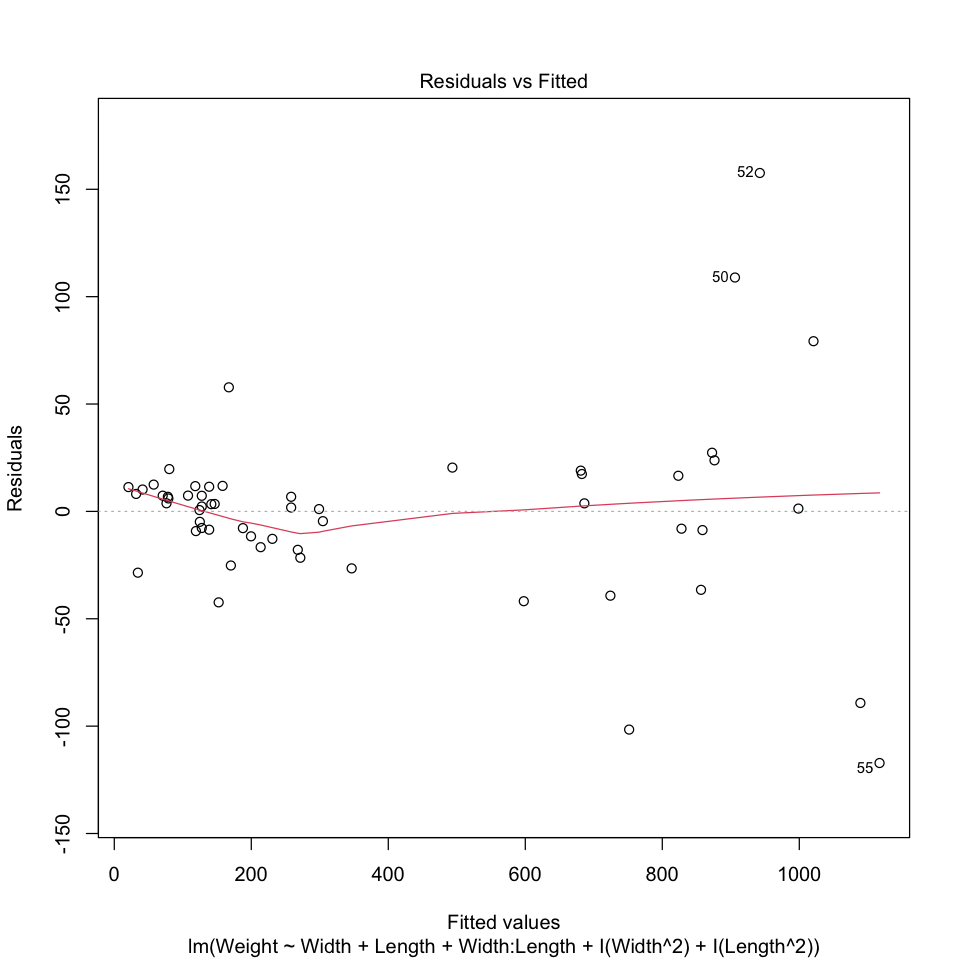

In [5]:
# Solution
fit <- lm(Weight ~ Width + Length + Width:Length + I(Width^2) + I(Length^2), data = Perch)
summary(fit)
plot(fit, which = 1)

*Write your notes here. Double-click to edit.*

*Solution.* 

- Linearity is met: residuals vs. fitted values plot has points roughly evenly distributed above and below the residuals = 0 line.

- Adjusted $R^2$ = 0.9846

### d.
Based on your findings above, which of these models do you think is best? Why? Consider diagnostic plots, $R_{adj}^2$, and model complexity.

*Write your notes here. Double-click to edit.*

*Solution.* Model 2 is a good compromise. Linearity is met. Also it is not too complicated: model 3 has a slightly higher adjusted R-squared, but model 2 is more parsmionious.

<div class="alert alert-warning">
    Remember:
    <blockquote>All models are wrong, but some are useful. -George Box</blockquote>
</div>

## Some more notes

- Why not just throw in everything we can think of?

- This will improve the fit to our sampled data, but probably won't generalize to the population

- Also, with more predictors, we lose degrees of freedom when calculating standard errors (SE), so confidence intervals and prediction intervals get wider, making it "harder" to reject hypotheses

- So... we only want to include as many terms as we need to actually make a significant difference &mdash; we don't want extra noise

## Recap: ways to compare models

- Adjusted $R^2$

- Which is simpler (if $R^2_{adj}$ values are close)

- Check linearity condition (and other conditions if inference is desired)

- Individual $t$-test $p$-values (for single terms)